### Imports and Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

sns.set_style("darkgrid")

URL = "https://drive.google.com/file/d/1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo/view"
URL = "https://drive.google.com/uc?id=" + URL.split("/")[-2]

pd.set_option("display.precision", 2)
tmp = pd.read_csv(URL)
df = tmp
df.index += 1

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
4,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
5,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


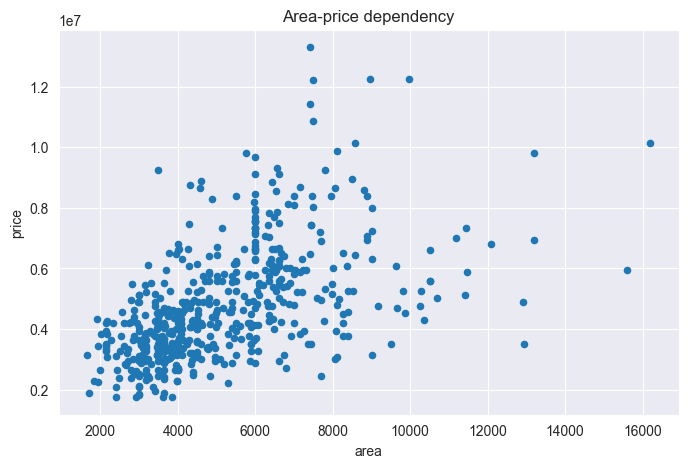

In [2]:
df.plot(
    x="area", y="price", kind="scatter", figsize=(8, 5), title="Area-price dependency"
)

plt.show()

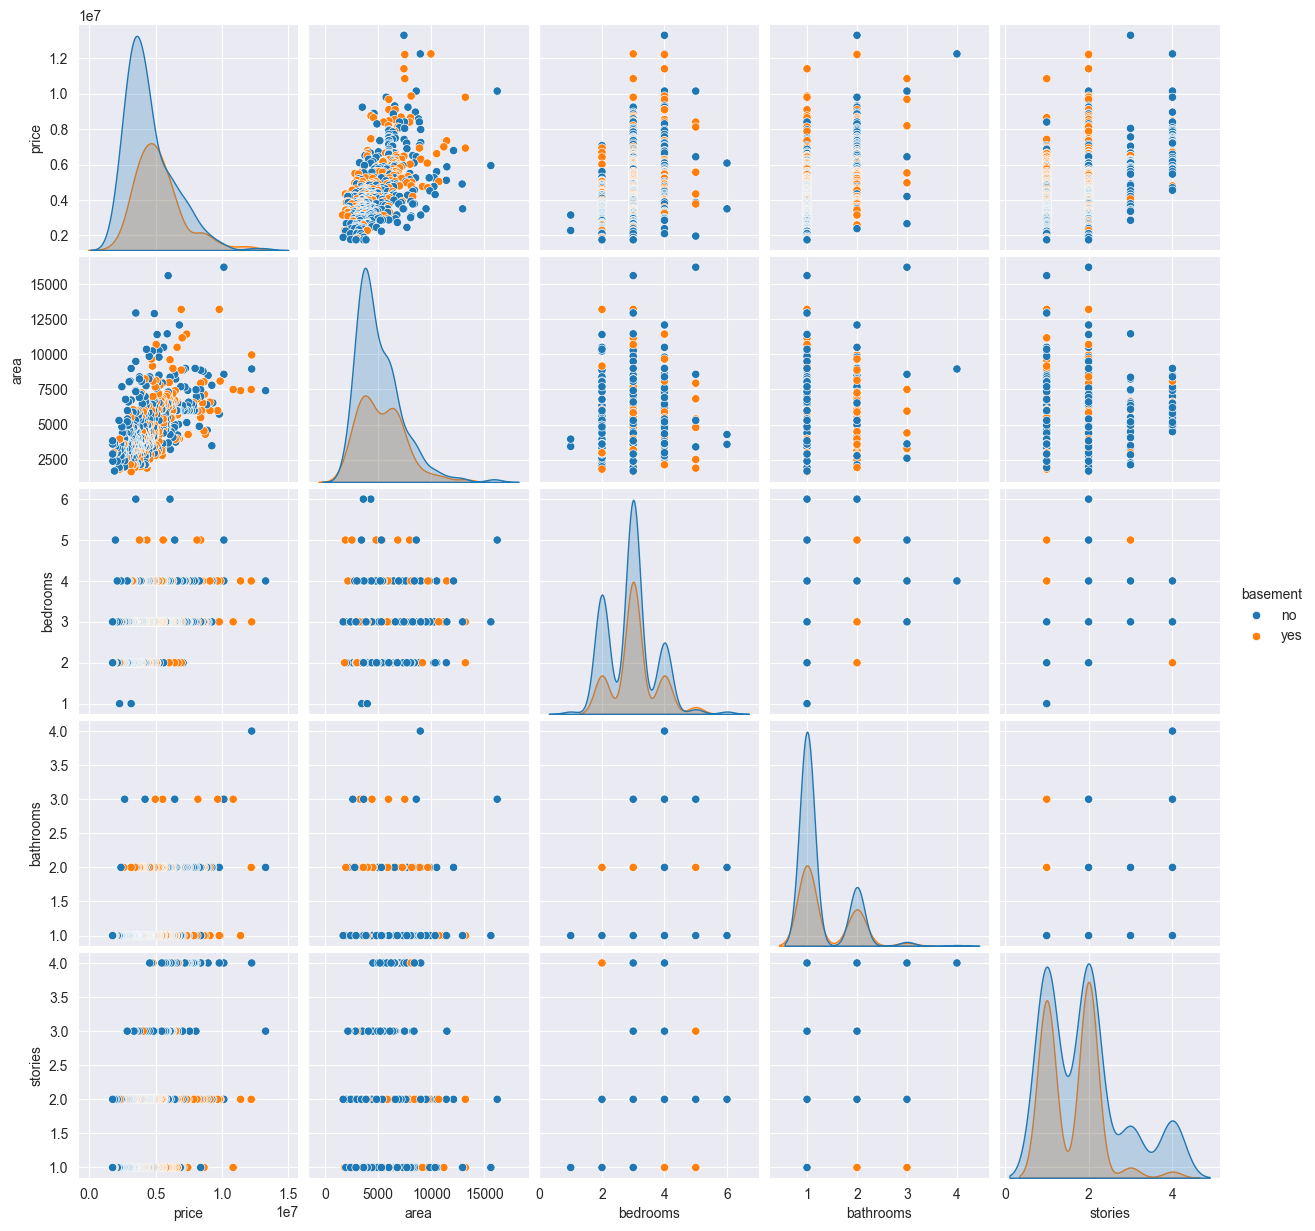

In [3]:
sns.pairplot(
    df, vars=["price", "area", "bedrooms", "bathrooms", "stories"], hue="basement"
)

plt.show()

In [4]:
print(df[["price", "area", "bedrooms", "bathrooms", "stories"]].corr())

           price  area  bedrooms  bathrooms  stories
price       1.00  0.54      0.37       0.52     0.42
area        0.54  1.00      0.15       0.19     0.08
bedrooms    0.37  0.15      1.00       0.37     0.41
bathrooms   0.52  0.19      0.37       1.00     0.33
stories     0.42  0.08      0.41       0.33     1.00


Data normalization

In [5]:
def normalization(data):
    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []
    for var in data:
        norm_var = (var - mean) / value_range
        result.append(norm_var)
    return result

In [6]:
norm = pd.DataFrame()
norm["price"] = normalization(df.price)
norm["area"] = normalization(df.area)
norm["bedrooms"] = normalization(df.bedrooms)
norm["bathrooms"] = normalization(df.bathrooms)

norm.index += 1
norm.head()

,price,area,bedrooms,bathrooms
1,0.74,0.16,2.07e-01,0.24
2,0.65,0.26,2.07e-01,0.90
3,0.65,0.33,6.97e-03,0.24
4,0.64,0.16,2.07e-01,0.24
5,0.58,0.16,2.07e-01,-0.10


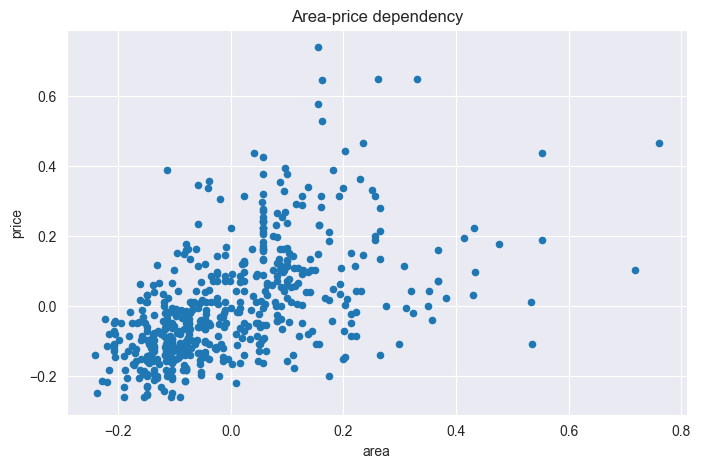

In [7]:
norm.plot(
    x="area", y="price", kind="scatter", figsize=(8, 5), title="Area-price dependency"
)

plt.show()

### Linear regression hypothesis function

in analytic form
$$h(x, y, z) = w_0 + w_1*x + w_2*y + w_3*z$$
or in vector form
$$h(\vec{x}) = \vec{w}*\vec{x}$$
where
x - area,
y - number of bedrooms,
z - number of bathrooms,
$\vec{w}$ - vector of weights,
$\vec{x}$ - vector of of features.

In [8]:
def h(w_0, w_1, w_2, w_3, x, y, z):
    return w_0 + w_1 * x + w_2 * y + w_3 * z

### Function to calculate the loss function

In [9]:
def loss_function(w_0, w_1, w_2, w_3, df):
    n = df.area.shape[0]
    cost = 0
    for p, x, y, z in zip(df.price, df.area, df.bedrooms, df.bathrooms):
        cost += (h(w_0, w_1, w_2, w_3, x, y, z) - p) ** 2
    return cost / (2 * n)

* Loss function for area

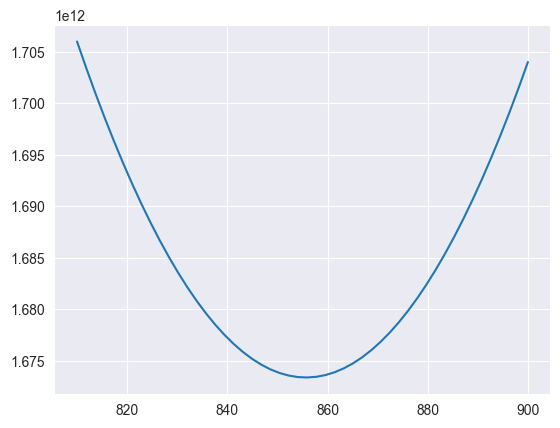

In [10]:
w_0 = 0
w_1 = np.linspace(810, 900, 50)
w_2 = 0
w_3 = 0
plt.plot(w_1, [loss_function(w_0, w, w_2, w_3, df) for w in w_1])
plt.show()

* Loss function for number of bedrooms

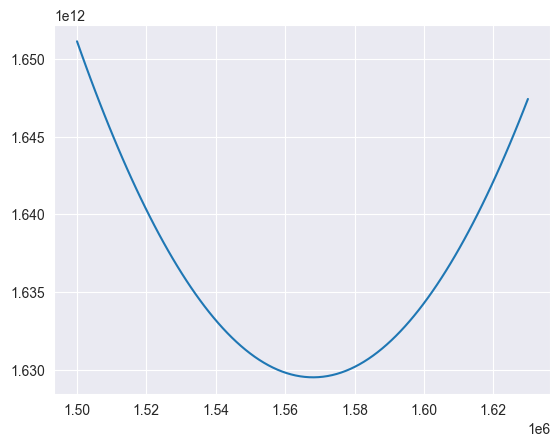

In [11]:
w_0 = 0
w_1 = 0
w_2 = np.linspace(1500000, 1630000, 100)
w_3 = 0
plt.plot(w_2, [loss_function(w_0, w_1, w, w_3, df) for w in w_2])
plt.show()

* Loss function for number of bathrooms

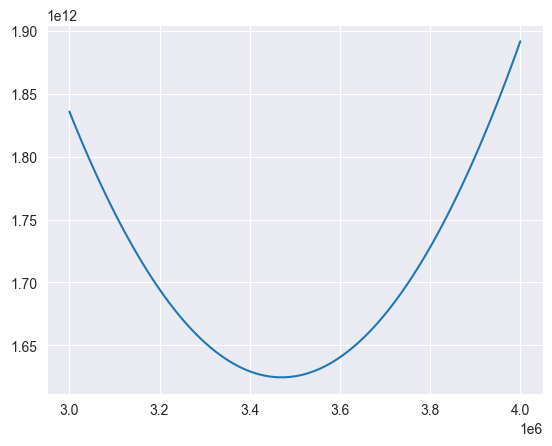

In [12]:
w_0 = 0
w_1 = 0
w_2 = 0
w_3 = np.linspace(3000000, 4000000, 100)
plt.plot(w_3, [loss_function(w_0, w_1, w_2, w, df) for w in w_3])
plt.show()

### One step of gradient descent

In [13]:
def grad_step(weights, grads, learn_rate=0.001):
    w_0, w_1, w_2, w_3 = weights
    grad_0, grad_1, grad_2, grad_3 = grads

    w_0 -= learn_rate * grad_0
    w_1 -= learn_rate * grad_1
    w_2 -= learn_rate * grad_2
    w_3 -= learn_rate * grad_3

    return w_0, w_1, w_2, w_3

In [14]:
def grad_w_0(w_0, w_1, w_2, w_3, df):
    n = df.area.shape[0]
    cost = 0

    for p, x, y, z in zip(df.price, df.area, df.bedrooms, df.bathrooms):
        cost += (h(w_0, w_1, w_2, w_3, x, y, z) - p) * 1

    return cost / n


def grad_w_1(w_0, w_1, w_2, w_3, df):
    n = df.area.shape[0]
    cost = 0

    for p, x, y, z in zip(df.price, df.area, df.bedrooms, df.bathrooms):
        cost += (h(w_0, w_1, w_2, w_3, x, y, z) - p) * x

    return cost / n


def grad_w_2(w_0, w_1, w_2, w_3, df):
    n = df.area.shape[0]
    cost = 0

    for p, x, y, z in zip(df.price, df.area, df.bedrooms, df.bathrooms):
        cost += (h(w_0, w_1, w_2, w_3, x, y, z) - p) * y

    return cost / n


def grad_w_3(w_0, w_1, w_2, w_3, df):
    n = df.area.shape[0]
    cost = 0

    for p, x, y, z in zip(df.price, df.area, df.bedrooms, df.bathrooms):
        cost += (h(w_0, w_1, w_2, w_3, x, y, z) - p) * z

    return cost / n

In [15]:
def grad_descent(weights, df, num_iter, learn_rate=0.001, epsilon=0.000000001):
    w_0, w_1, w_2, w_3 = weights
    loss = loss_function(w_0, w_1, w_2, w_3, df)
    loss_history = [loss]

    for i in range(num_iter):
        d_w_0 = grad_w_0(w_0, w_1, w_2, w_3, df)
        d_w_1 = grad_w_1(w_0, w_1, w_2, w_3, df)
        d_w_2 = grad_w_2(w_0, w_1, w_2, w_3, df)
        d_w_3 = grad_w_3(w_0, w_1, w_2, w_3, df)
        grads = (d_w_0, d_w_1, d_w_2, d_w_3)

        w_0, w_1, w_2, w_3 = grad_step(weights, grads, learn_rate=learn_rate)
        weights = (w_0, w_1, w_2, w_3)
        loss = loss_function(w_0, w_1, w_2, w_3, df)

        if abs(loss - loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break
        loss_history.append(loss)

    return weights, loss_history

Model training

In [16]:
weights, loss_history = grad_descent((0.0, 0.0, 0.0, 0.0), norm, 3000, learn_rate=0.1)

In [17]:
weights

(4.455151843771027e-17,
 0.4728086550614769,
 0.17908241906278172,
 0.35970431924416346)

In [18]:
w_0, w_1, w_2, w_3 = weights

In [19]:
len(loss_history)

2096

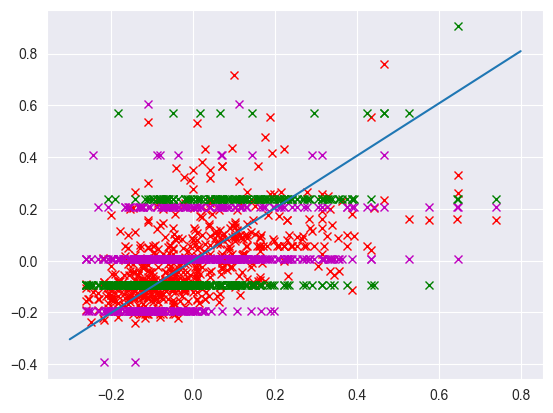

In [20]:
plt.figure(figure=(10, 8))
plt.plot(norm.price, norm.area, "rx")
plt.plot(norm.price, norm.bedrooms, "mx")
plt.plot(norm.price, norm.bathrooms, "gx")
x = np.linspace(-0.3, 0.8, 500)
y = np.linspace(-0.3, 0.8, 500)
z = np.linspace(-0.3, 0.8, 500)
plt.plot(x, h(w_0, w_1, w_2, w_3, x, y, z))
plt.show()

Learning curve

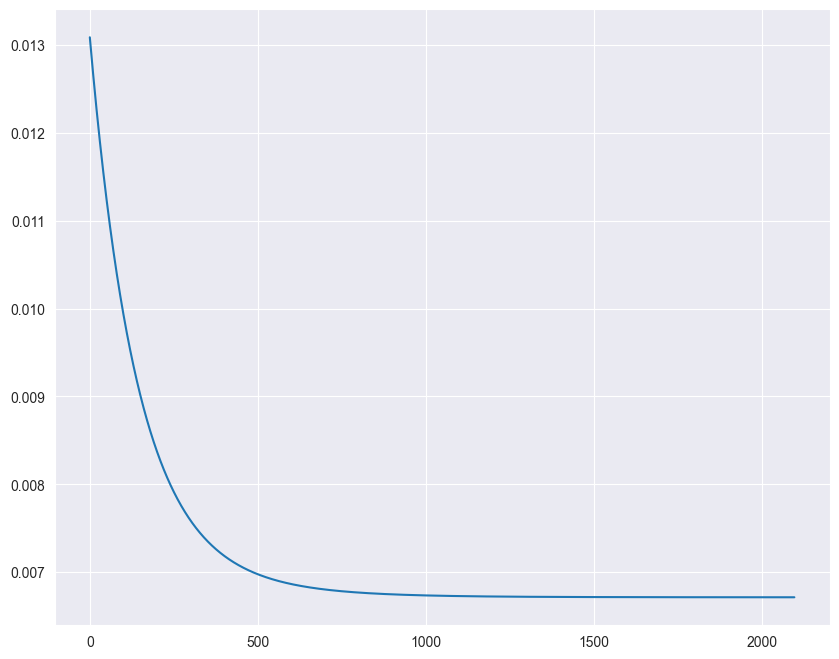

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(loss_history)
plt.show()